# BibRec: Training Random Forest Model

### Train Random Forest Model on top-rated books
RF Features: Country, State, Age, Year-of-Publication, Publisher

In [48]:
# Specify where to save the model
model_file = "rf5.pkl"

In [49]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv',
                                            users_path='data/BX-Users.csv',
                                            ratings_path='data/BX-Book-Ratings.csv')

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:94: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [50]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,27.636730,nyc,new_york,usa,0.0,0.0
1,2,18.000000,stockton,california,usa,0.0,0.0
2,3,18.894620,moscow,other,other,0.0,0.0
3,4,17.000000,porto,other,portugal,0.0,0.0
4,5,33.895685,farnborough,other,united_kingdom,0.0,0.0
...,...,...,...,...,...,...,...
278853,278854,44.240219,portland,oregon,usa,7.0,6.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.0,0.0
278855,278856,33.827293,brampton,ontario,canada,0.0,0.0
278856,278857,30.725662,knoxville,other,usa,0.0,0.0


In [51]:
books = books.drop(["isbn"], axis=1)
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9


In [52]:
ratings = ratings.drop(["isbn"], axis=1)
ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780155061224,0.0,276726,5
1,9780521656153,-1.5,276729,3
2,9780521795029,1.5,276729,6
3,9780385501200,0.0,276744,7
4,9780385501200,0.0,11676,10
...,...,...,...,...
9444717,9780515107661,0.0,242006,10
9444718,9780515107661,0.0,249628,10
9444719,9780515107661,0.0,276709,10
9444720,9780590442442,0.0,197659,8


In [53]:
# limit data to top-rated books only
top_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
top_ratings = top_ratings[:100]
top_ratings = top_ratings.reset_index()

# user_id => nr of ratings
top_ratings = top_ratings.drop('user_id', axis=1)

top_ratings = top_ratings.merge(ratings, on='isbn13', how='inner')

top_ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780316666343,1.000000,277439,7
1,9780316666343,1.000000,277752,7
2,9780316666343,1.000000,278633,9
3,9780316666343,1.000000,638,10
4,9780316666343,1.000000,709,3
...,...,...,...,...
4391748,9780553572995,-1.891304,274004,9
4391749,9780553572995,-1.891304,274692,7
4391750,9780553572995,-1.891304,275519,8
4391751,9780553572995,-1.891304,276203,10


In [54]:
# TODO: Experiment 1
top_ratings = ratings[:1000]

In [55]:
filtered_books = books[books.isbn13.isin(top_ratings.isbn13)]
filtered_books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
102,The Pillars of the Earth,Ken Follett,1996,signet_book,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,9780451166890,8.390805,87.0,9
166,Bridget Jones's Diary,Helen Fielding,1997,other,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,9780330332774,7.458333,72.0,8
1027,Hoot (Newbery Honor Book),CARL HIAASEN,2002,other,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,9780375821813,8.300000,10.0,3
1836,Waiting to Exhale,Terry McMillan,1995,pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,9780671537456,7.176471,17.0,10
1986,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,other,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,9780684867625,7.116667,60.0,6
2238,"Blackwood Farm (Rice, Anne, Vampire Chronicles.)",ANNE RICE,2003,ballantine_books,http://images.amazon.com/images/P/0345443683.0...,http://images.amazon.com/images/P/0345443683.0...,http://images.amazon.com/images/P/0345443683.0...,9780345443687,7.950000,20.0,2
3217,Artemis Fowl.,Eoin Colfer,2003,other,http://images.amazon.com/images/P/3548603203.0...,http://images.amazon.com/images/P/3548603203.0...,http://images.amazon.com/images/P/3548603203.0...,9783548603209,8.200000,10.0,2
4779,Little Altars Everywhere,Rebecca Wells,2003,other,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,9780060517793,8.000000,30.0,2
4884,Die zweite Haut.,Dean Koontz,1995,other,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,9783453092006,8.000000,3.0,10
5506,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,9780439358064,9.038647,207.0,2


In [56]:
filtered_users = users[users.user_id.isin(top_ratings.user_id)]
filtered_users

,user_id,age,city,state,country,user_mean,user_count
98,99,42.000000,franktown,other,usa,7.625000,8.0
745,746,36.000000,longmont,other,usa,7.250000,4.0
1584,1585,29.000000,albuquerque,other,usa,5.875000,16.0
1847,1848,22.000000,bellingham,washington,usa,8.806452,31.0
2032,2033,27.000000,omaha,other,usa,8.720930,129.0
...,...,...,...,...,...,...,...
277194,277195,54.000000,san francisco,california,usa,9.900000,10.0
278313,278314,23.525682,norfolk,virginia,usa,5.800000,10.0
278355,278356,57.000000,lakeland,other,usa,8.138889,36.0
278553,278554,22.000000,takasaki,other,other,8.666667,12.0


In [57]:
encoded_books = hot_encode_books(filtered_books)
# encoded_books = hot_encode_books(books)
encoded_books

,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
102,The Pillars of the Earth,Ken Follett,1996,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,9780451166890,8.390805,87.0,9,...,0,0,1,0,0,0,0,0,0,0
166,Bridget Jones's Diary,Helen Fielding,1997,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,9780330332774,7.458333,72.0,8,...,0,0,0,0,0,0,0,0,0,1
1027,Hoot (Newbery Honor Book),CARL HIAASEN,2002,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,9780375821813,8.300000,10.0,3,...,0,0,0,0,0,0,0,0,0,1
1836,Waiting to Exhale,Terry McMillan,1995,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,9780671537456,7.176471,17.0,10,...,0,0,0,0,0,0,0,0,0,0
1986,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,9780684867625,7.116667,60.0,6,...,0,0,0,0,0,0,0,0,0,1
2238,"Blackwood Farm (Rice, Anne, Vampire Chronicles.)",ANNE RICE,2003,http://images.amazon.com/images/P/0345443683.0...,http://images.amazon.com/images/P/0345443683.0...,http://images.amazon.com/images/P/0345443683.0...,9780345443687,7.950000,20.0,2,...,0,0,0,0,0,0,0,0,0,0
3217,Artemis Fowl.,Eoin Colfer,2003,http://images.amazon.com/images/P/3548603203.0...,http://images.amazon.com/images/P/3548603203.0...,http://images.amazon.com/images/P/3548603203.0...,9783548603209,8.200000,10.0,2,...,0,0,0,0,0,0,0,0,0,1
4779,Little Altars Everywhere,Rebecca Wells,2003,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,9780060517793,8.000000,30.0,2,...,0,0,0,0,0,0,0,0,0,1
4884,Die zweite Haut.,Dean Koontz,1995,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,9783453092006,8.000000,3.0,10,...,0,0,0,0,0,0,0,0,0,1
5506,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,9780439358064,9.038647,207.0,2,...,0,0,0,0,0,0,0,0,0,0


In [58]:
encoded_users = hot_encode_users(filtered_users)
# encoded_users = hot_encode_users(users)
encoded_users

,user_id,age,city,user_mean,user_count,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
98,99,42.000000,franktown,7.625000,8.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
745,746,36.000000,longmont,7.250000,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1584,1585,29.000000,albuquerque,5.875000,16.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1847,1848,22.000000,bellingham,8.806452,31.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2032,2033,27.000000,omaha,8.720930,129.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277194,277195,54.000000,san francisco,9.900000,10.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278313,278314,23.525682,norfolk,5.800000,10.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
278355,278356,57.000000,lakeland,8.138889,36.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278553,278554,22.000000,takasaki,8.666667,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
102,9780451166890,9,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
166,9780330332774,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1027,9780375821813,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1836,9780671537456,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,9780684867625,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2238,9780345443687,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3217,9783548603209,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4779,9780060517793,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4884,9783453092006,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5506,9780439358064,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
98,99,42.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
745,746,36.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1584,1585,29.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1847,1848,22.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2032,2033,27.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277194,277195,54.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278313,278314,23.525682,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
278355,278356,57.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278553,278554,22.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
0,9780155061224,276726,5
1,9780521656153,276729,3
2,9780521795029,276729,6
3,9780385501200,276744,7
4,9780385501200,11676,10
...,...,...,...
995,9780440225829,159822,5
996,9780440225829,166281,6
997,9780440225829,174892,8
998,9780440225829,176807,9


In [62]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
# df = df.merge(df_books, on="isbn13")
# df = df.merge(df_users, on="user_id")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780155061224,276726,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780521656153,276729,3,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780521795029,276729,6,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780385501200,276744,7,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780385501200,11676,10,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9780440225829,159822,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,9780440225829,166281,6,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,9780440225829,174892,8,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,9780440225829,176807,9,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [64]:
X

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780155061224,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780521656153,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780521795029,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780385501200,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780385501200,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9780440225829,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,9780440225829,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,9780440225829,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,9780440225829,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
Y

0       5
1       3
2       6
3       7
4      10
       ..
995     5
996     6
997     8
998     9
999     7
Name: book_rating, Length: 1000, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [67]:
from os.path import exists
import pickle

if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Loading file: rf5.pkl


In [68]:
rfc.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.2s


building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93

[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [69]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [70]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


array([ 8, 10, 10,  8,  5, 10,  7,  8,  8, 10,  8, 10, 10, 10,  4, 10,  8,
        8, 10,  8,  8,  8, 10,  8,  9,  6,  9,  7,  7,  9,  8,  9,  4,  6,
       10, 10,  8,  8,  9,  7,  9,  9,  8,  9,  9,  9,  8, 10,  5,  8,  8,
        9,  8, 10,  8,  9,  7, 10,  8,  7, 10,  9,  9, 10,  9, 10,  7, 10,
        8,  7,  8,  8,  9,  7, 10, 10, 10, 10,  9, 10,  5,  8, 10,  9, 10,
        8,  7,  8,  7,  7,  8,  9,  5,  6,  9,  8,  7,  7,  8,  7, 10,  8,
       10,  9, 10, 10, 10,  5, 10,  8, 10, 10,  5,  7,  7,  6,  7,  7,  8,
        9,  9, 10,  8, 10, 10,  8,  9,  7,  7,  8, 10, 10,  7,  8,  9,  6,
       10,  7,  8,  5,  8,  9,  8,  9, 10,  7,  8,  5, 10,  9, 10, 10,  9,
        6,  5, 10,  8,  8,  9, 10,  9, 10,  6,  8, 10,  8,  8, 10,  9, 10,
        8,  9,  8,  9,  7,  9, 10,  8,  7,  9,  8,  7,  8,  8,  9,  8, 10,
        8,  8, 10,  9,  8,  7,  7,  8, 10, 10,  9,  9,  9, 10,  6,  9,  6,
        7,  7,  7,  8, 10,  9,  6, 10,  5, 10,  9,  7,  8,  3,  8,  9,  8,
        7, 10, 10, 10,  9

In [71]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.07      0.05      0.06        20
           6       0.00      0.00      0.00        30
           7       0.19      0.22      0.21        36
           8       0.29      0.38      0.33        63
           9       0.23      0.23      0.23        61
          10       0.46      0.48      0.47        82

    accuracy                           0.29       300
   macro avg       0.14      0.15      0.14       300
weighted avg       0.26      0.29      0.27       300

28.666666666666668


/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks  

Confusion matrix, without normalization
[[ 0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  3  0  2]
 [ 0  0  1  1  2  1  6  7  2]
 [ 0  0  0  1  0  5 11  7  6]
 [ 0  0  1  2  1  8  8  9  7]
 [ 0  0  0  4  3  6 24 11 15]
 [ 0  0  0  4  1 14 15 14 13]
 [ 0  1  1  1  4  7 15 14 39]]


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Normalized confusion matrix
[[0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.14 0.14 0.43 0.   0.29]
 [0.   0.   0.05 0.05 0.1  0.05 0.3  0.35 0.1 ]
 [0.   0.   0.   0.03 0.   0.17 0.37 0.23 0.2 ]
 [0.   0.   0.03 0.06 0.03 0.22 0.22 0.25 0.19]
 [0.   0.   0.   0.06 0.05 0.1  0.38 0.17 0.24]
 [0.   0.   0.   0.07 0.02 0.23 0.25 0.23 0.21]
 [0.   0.01 0.01 0.01 0.05 0.09 0.18 0.17 0.48]]


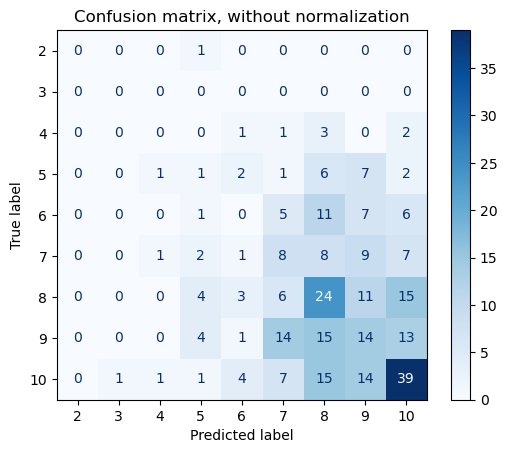

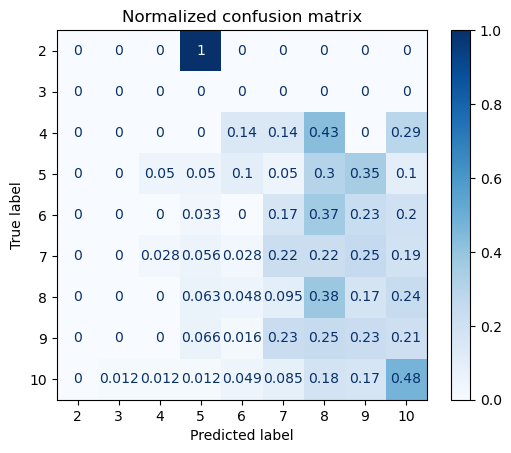

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [73]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9728571428571429

In [74]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.431081
0,isbn13,0.111143
1,normalized_year_of_publication,0.089058
65,state_other,0.029409
24,country_usa,0.019817
...,...,...
36,country_brazil,0.000000
37,country_china,0.000000
38,country_sweden,0.000000
39,country_india,0.000000


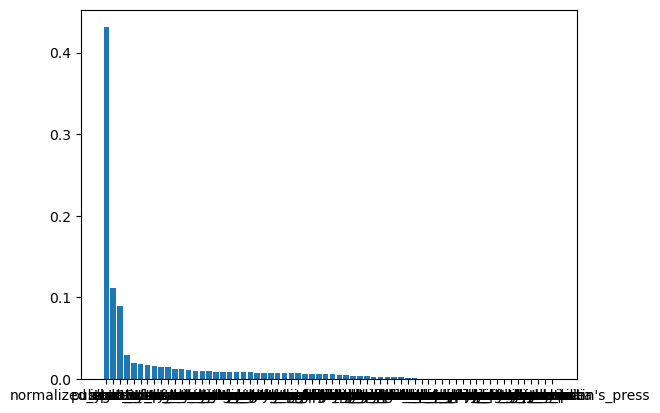

In [75]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [76]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
24,country_usa,0.019817
44,country_other,0.014624
25,country_canada,0.012198
41,country_malaysia,0.009107
26,country_united_kingdom,0.008874
28,country_spain,0.008395
27,country_germany,0.008212
29,country_australia,0.007241
32,country_portugal,0.004489
40,country_austria,0.003297


In [77]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
65,state_other,0.029409
45,state_california,0.017754
49,state_texas,0.014369
50,state_new_york,0.012160
58,state_oregon,0.010648
53,state_illinois,0.010415
56,state_ohio,0.010135
59,state_virginia,0.009645
46,state_n/a,0.008312
61,state_missouri,0.008240


In [78]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
7,publisher_scholastic,0.018941
22,publisher_other,0.016466
15,publisher_signet_book,0.006561
4,publisher_pocket,0.003895
5,publisher_ballantine_books,0.003192
6,publisher_bantam_books,0.002784
20,publisher_harpercollins_publishers,0.001957
19,publisher_tor_books,0.001753
17,publisher_st_martins_pr,0.000000
8,publisher_simon_&amp;_schuster,0.000000


In [79]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.431081
Name: Importances, dtype: float64
country_importance: 0.10791210967741531
state_importance: 0.2052582320083592
publisher_importance: 0.05554859580229529
